In [2]:
path = '../data/ProteinNPT_data/fitness/substitutions_singles'
import os
# 获取所有 CSV 文件
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_files

['SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM.csv',
 'VKOR1_HUMAN_Chiasson_2020_abundance.csv',
 'RASK_HUMAN_Weng_2022_binding-DARPin_K55.csv',
 'CAS9_STRP1_Spencer_2017_positive.csv',
 'Q53Z42_HUMAN_McShan_2019_binding-TAPBPR.csv',
 'CASP3_HUMAN_Roychowdhury_2020.csv',
 'PSAE_SYNP2_Tsuboyama_2023_1PSE.csv',
 'OTU7A_HUMAN_Tsuboyama_2023_2L2D.csv',
 'TPOR_HUMAN_Bridgford_2020.csv',
 'FKBP3_HUMAN_Tsuboyama_2023_2KFV.csv',
 'GFP_AEQVI_Sarkisyan_2016.csv',
 'A4GRB6_PSEAI_Chen_2020.csv',
 'SPIKE_SARS2_Starr_2020_binding.csv',
 'RPC1_LAMBD_Li_2019_low-expression.csv',
 'UBR5_HUMAN_Tsuboyama_2023_1I2T.csv',
 'YNZC_BACSU_Tsuboyama_2023_2JVD.csv',
 'DYR_ECOLI_Thompson_2019.csv',
 'A4D664_9INFA_Soh_2019.csv',
 'NPC1_HUMAN_Erwood_2022_RPE1.csv',
 'RPC1_BP434_Tsuboyama_2023_1R69.csv',
 'HXK4_HUMAN_Gersing_2023_abundance.csv',
 'CP2C9_HUMAN_Amorosi_2021_abundance.csv',
 'HEM3_HUMAN_Loggerenberg_2023.csv',
 'BCHB_CHLTE_Tsuboyama_2023_2KRU.csv',
 'RASH_HUMAN_Bandaru_2017.csv',
 'HSP82_YEAST_Flynn_201

In [6]:
import pandas as pd
mut_num = []
for csv_file in csv_files:
    mut_num.append(int(len(pd.read_csv(os.path.join(path,csv_file)))/5))
mut_num

[3637,
 2695,
 3084,
 8117,
 3344,
 1567,
 1219,
 635,
 562,
 1237,
 1084,
 5004,
 3802,
 351,
 1094,
 714,
 2363,
 14421,
 63,
 1124,
 8396,
 6370,
 5689,
 890,
 3134,
 13294,
 747,
 707,
 168,
 889,
 955,
 1201,
 9462,
 6227,
 1801,
 1034,
 265,
 165,
 1118,
 3066,
 4996,
 33,
 1213,
 6396,
 10715,
 2147,
 1163,
 1367,
 1239,
 2350,
 917,
 1195,
 12003,
 2844,
 2374,
 7217,
 637,
 1118,
 1301,
 1176,
 1216,
 1820,
 1010,
 1084,
 2223,
 4960,
 1813,
 1212,
 975,
 10094,
 697,
 928,
 1029,
 621,
 1195,
 1195,
 1149,
 1051,
 224,
 796,
 4670,
 3648,
 1169,
 12577,
 1630,
 9462,
 1154,
 12729,
 12464,
 969,
 9803,
 1019,
 4996,
 6142,
 4007,
 10754,
 1121,
 1048,
 7890,
 940,
 8756,
 6917,
 3798,
 4783,
 1202,
 2916,
 7467,
 1700,
 1663,
 1306,
 1040,
 6137,
 1777,
 1837,
 1577,
 16749,
 723,
 15711,
 1195,
 5725,
 3181,
 1253,
 686,
 697,
 1211,
 12863,
 16853,
 297,
 1519,
 11576,
 359,
 798,
 679,
 1519,
 899,
 656,
 1680,
 669,
 1244,
 1914,
 298,
 2122,
 1357,
 1035,
 8570,
 1141,
 

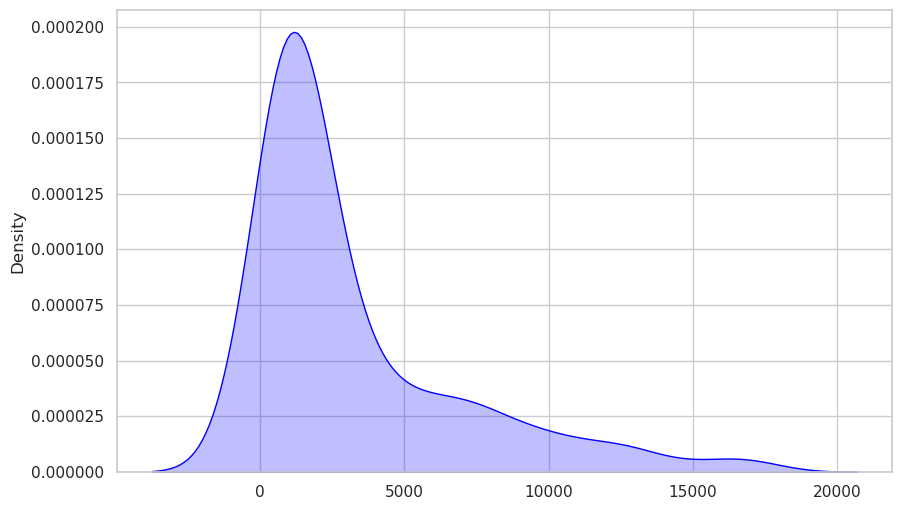

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
sns.set_theme(style="whitegrid")

# 绘制高斯分布图
plt.figure(figsize=(10, 6))
sns.kdeplot(mut_num, fill=True, color='blue')
plt.show()

In [22]:
import pandas as pd

def split_sample_data(df_path, sample_size,fold_type,val_frac = 0.2):
    # 获取符合模式的所有 CSV 文件
    #fold_types : 'fold_random_5','fold_modulo_5','fold_contiguous_5'
    # sample_size = 20,40,60,80,100


    df = pd.read_csv(df_path)
    if len(df)/5>sample_size:

        data = df[df[fold_type]==0]
        train_data = data.sample(n=sample_size,random_state=1)  # random_state 用于可复现的结果
        # 从 DataFrame 中随机采样
    elif len(df)/5<sample_size<len(df):
        train_data = df.sample(n=sample_size,random_state=1)  # random_state 用于可复现的结果

    else:
        print('------数据集中的样本数小于采样数,默认使用当前数据集中一半的样本用于训练------!')
        train_data = df.sample(frac = 0.5,random_state = 1)
    test_data=df[~df.index.isin(train_data.index)]
    val_data = train_data.sample(frac=val_frac,random_state=1)
    train_data = train_data[~train_data.index.isin(val_data.index)]

    # 合并所有样本
    return train_data,val_data,test_data



In [23]:
train_data,val_data,test_data = split_sample_data(os.path.join(path,'SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM.csv'),sample_size=100,fold_type='fold_modulo_5')

     mutant                                   mutated_sequence  DMS_score  \
0     A296D  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...  -0.729872   
1     A296E  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...  -0.581588   
2     A296F  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...  -0.606695   
3     A296G  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...  -0.598207   
4     A296I  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...  -0.527510   
...     ...                                                ...        ...   
3632  Y514P  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...   1.933678   
3633  Y514R  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...   0.802702   
3634  Y514S  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...   0.352992   
3635  Y514T  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...   0.301911   
3636  Y514V  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...   0.560810   

      DMS_score_bin  fold_random_5  fold_modulo_5  fold_contiguous_5  
0   

In [24]:
train_data

,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5
2812,S345I,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.955628,1,1,0,1
1747,L410M,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.236424,0,1,0,2
48,A370F,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.462643,0,4,0,2
1098,G440H,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.260074,0,3,0,3
1741,L410A,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.652137,0,2,0,2
...,...,...,...,...,...,...,...
3481,W502M,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.221607,0,1,0,4
3473,W502D,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.377209,0,2,0,4
895,F518Y,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.366278,1,1,0,4
604,E435F,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.843129,0,1,0,3


In [25]:
val_data

,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5
1646,L350G,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.512430,1,3,0,1
32,A330G,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.556508,0,3,0,1
3404,W285K,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,3.061571,1,0,0,0
2818,S345T,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.300377,1,1,0,1
3149,V295A,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.027603,1,4,0,0
2813,S345L,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,1.292468,1,3,0,1
2303,P491R,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.084224,1,3,0,4
3402,W285H,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,1.554666,1,0,0,0
194,A425V,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.531211,0,0,0,3
2389,Q315N,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.435651,1,1,0,0


In [26]:
test_data

,mutant,mutated_sequence,DMS_score,DMS_score_bin,fold_random_5,fold_modulo_5,fold_contiguous_5
0,A296D,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.729872,0,4,1,0
1,A296E,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.581588,0,2,1,0
2,A296F,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.606695,0,0,1,0
3,A296G,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.598207,0,4,1,0
4,A296I,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,-0.527510,0,3,1,0
...,...,...,...,...,...,...,...
3632,Y514P,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,1.933678,1,1,2,4
3633,Y514R,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.802702,1,4,2,4
3634,Y514S,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.352992,1,0,2,4
3635,Y514T,MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...,0.301911,1,3,2,4


In [ ]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})

In [37]:
sample_size_list = [20,40,60,80,100]
test_result = [1,1,1,1,1]
dic = {'dataset' : 'aaa'}
dic.update(dict(zip([f'sample_size_{sample_size}' for sample_size in sample_size_list],test_result)))



In [38]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'b': 3, 'c': 4}

# 合并 dict2 到 dict1
dict1.update(dict2)

print(dict1)

{'a': 1, 'b': 3, 'c': 4}


In [40]:
sample_size_list = [20, 40, 60, 80, 100]
test_result = [1, 1, 1, 1, 1]

# 创建初始字典
result = {'dataset': 'aaa'}

# 更新字典
result.update(dict(zip([f'sample_size_{sample_size}' for sample_size in sample_size_list], test_result)))

# 打印最终结果
print(result)

{'dataset': 'aaa', 'sample_size_20': 1, 'sample_size_40': 1, 'sample_size_60': 1, 'sample_size_80': 1, 'sample_size_100': 1}


In [43]:
import pandas as pd 
pd.DataFrame(result)

ValueError: If using all scalar values, you must pass an index

In [44]:
dataset = 'your_dataset.csv'
sample_size_list = [100, 200, 300]
test_result = [0.8, 0.85, 0.9]
args = {
    'fold_split_type': 'type1',
    'model_seed': 42
}

# 创建字典
dic = {'dataset': [dataset]}  # 将单个值转换为列表

# 更新字典
dic.update(dict(zip([f'sample_size_{sample_size}' for sample_size in sample_size_list], test_result)))

# 创建 DataFrame
result_df = pd.DataFrame(dic)
result_df

,dataset,sample_size_100,sample_size_200,sample_size_300
0,your_dataset.csv,0.8,0.85,0.9


In [50]:
sample_size = 100
from datetime import datetime
log_dir = os.path.join('scripts/runs', f"{dataset}/",f"{args['fold_split_type']}_model_seed_{args['model_seed']}_time_{datetime.now().strftime("%Y-%m-%d %H-%M")}_sample_size_{sample_size}")
log_dir

'scripts/runs/your_dataset.csv/type1_model_seed_42_time_2024-08-04 19-47_sample_size_100'

In [1]:
import pandas as pd
df = pd.DataFrame({'a':[1,2,3,4,5],'b':[2,3,4,5,6]})

In [2]:
df[:3]

,a,b
0,1,2
1,2,3
2,3,4
